In [1]:
from groupcw.preprocessing import productivity, core_inflation, median_pay
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

<h1>Productivity</h1>

In [2]:
# Drop the entries prior to (2014, 3)
pdf = productivity()
pdf = pdf.loc[(pdf.index.get_level_values(0) > 2014) | (pdf.index.get_level_values(0) == 2014) & (pdf.index.get_level_values(1) >= 3)]
print(pdf.head())
# Normalise the data
pdf["Productivity-Normalised"] = (pdf["Productivity"] - pdf["Productivity"].mean()) / pdf["Productivity"].std()
_, pvalue, _, _, _, _ = adfuller(pdf['Productivity-Normalised'])
print(f"P-Value: {pvalue}")

            Productivity  Quarter
Year Month                       
2014 3              95.7        1
     4              95.8        2
     5              95.8        2
     6              95.8        2
     7              96.3        3
P-Value: 0.6833166300639472


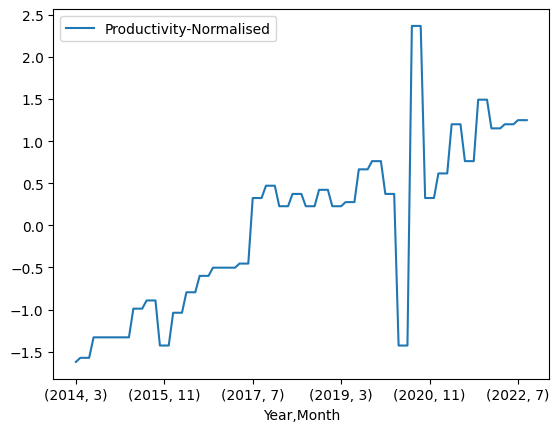

In [3]:
# Plot the normalised productivity
pdf.plot(y='Productivity-Normalised')
plt.show()

/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


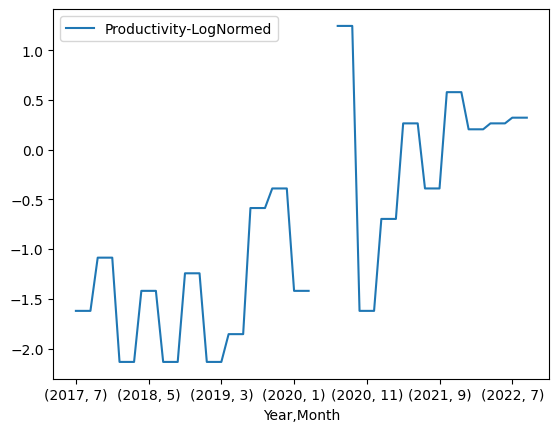

In [4]:
pdf['Productivity-LogNormed'] = np.log2(pdf['Productivity-Normalised'])
pdf.plot(y='Productivity-LogNormed')
plt.show()

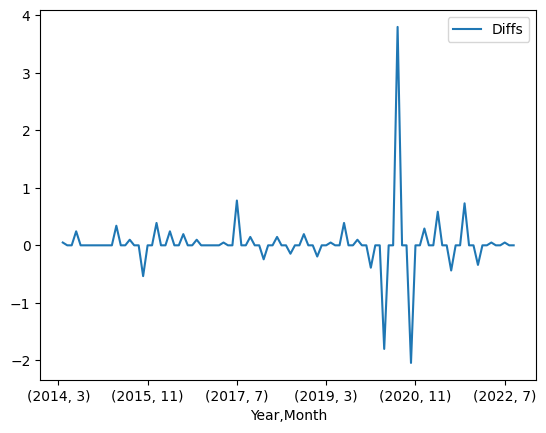

In [5]:
pdf['Diffs'] = pdf['Productivity-Normalised'].diff()
pdf.plot(y='Diffs')
plt.show()

In [6]:
# Save pdf to csv
pdf.to_csv("data/productivity_normed.csv")

<h1>Median Pay</h1>

In [7]:
# Drop the entries prior to (2014, 3)
mpdf = median_pay()
print(mpdf.head())

            Full-Time   Part-Time          All
Year Month                                    
2015 1        2281.91  718.780000  1840.250000
     2        2286.24  722.749167  1844.940833
     3        2290.57  726.718333  1849.631667
     4        2294.90  730.687500  1854.322500
     5        2299.23  734.656667  1859.013333


In [8]:
# Normalise the data
mpdf["Full-Time-Normalised"] = (mpdf["Full-Time"] - mpdf["Full-Time"].mean()) / mpdf["Full-Time"].std()
mpdf["Part-Time-Normalised"] = (mpdf["Part-Time"] - mpdf["Part-Time"].mean()) / mpdf["Part-Time"].std()
mpdf["All-Normalised"] = (mpdf["All"] - mpdf["All"].mean()) / mpdf["All"].std()
_, pvalue, _, _, _, _ = adfuller(mpdf['Full-Time-Normalised'])
print(f"P-Value (FT): {pvalue}")
_, pvalue, _, _, _, _ = adfuller(mpdf['Part-Time-Normalised'])
print(f"P-Value (PT): {pvalue}")
_, pvalue, _, _, _, _ = adfuller(mpdf['All-Normalised'])
print(f"P-Value (All): {pvalue}")

P-Value (FT): 0.9955504516249292
P-Value (PT): 0.9978296622913647
P-Value (All): 0.9961300602111522


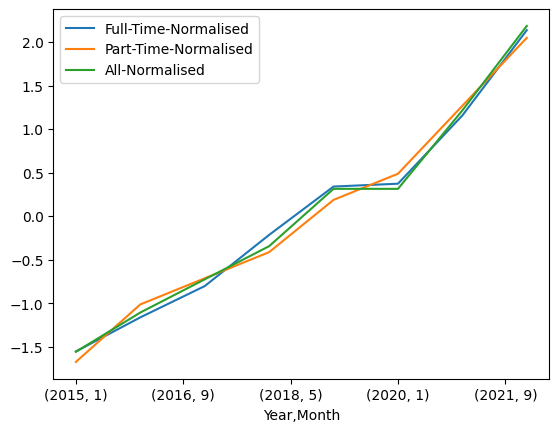

In [9]:
mpdf.plot(y=['Full-Time-Normalised', 'Part-Time-Normalised', 'All-Normalised'])
plt.show()

/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


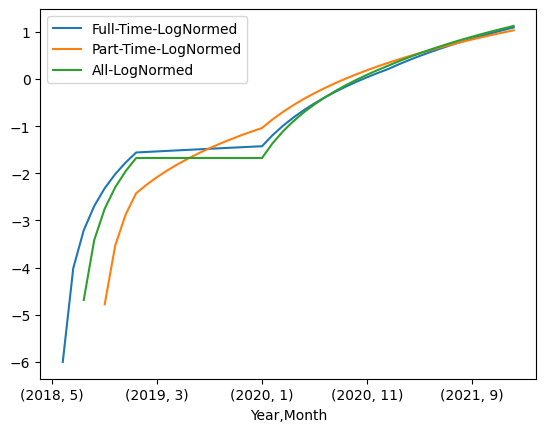

In [10]:
mpdf['Full-Time-LogNormed'] = np.log2(mpdf['Full-Time-Normalised'])
mpdf['Part-Time-LogNormed'] = np.log2(mpdf['Part-Time-Normalised'])
mpdf['All-LogNormed'] = np.log2(mpdf['All-Normalised'])
mpdf.plot(y=['Full-Time-LogNormed', 'Part-Time-LogNormed', 'All-LogNormed'])
plt.show()

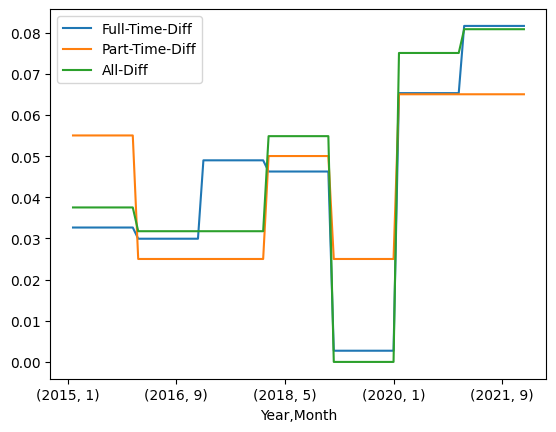

In [11]:
mpdf['Full-Time-Diff'] = mpdf['Full-Time-Normalised'].diff()
mpdf['Part-Time-Diff'] = mpdf['Part-Time-Normalised'].diff()
mpdf['All-Diff'] = mpdf['All-Normalised'].diff()
mpdf.plot(y=['Full-Time-Diff', 'Part-Time-Diff', 'All-Diff'])
plt.show()

In [12]:
mpdf.to_csv("data/mpdf.csv")

<h1>Core Inflation</h1>

In [14]:
cidf = core_inflation()
cidf = cidf.loc[(cidf.index.get_level_values(0) > 2014) | (cidf.index.get_level_values(0) == 2014) & (cidf.index.get_level_values(1) >= 3)]
print(cidf.head())

            CPIH  Core
Year Month            
2014 3       1.5   1.5
     4       1.7   1.8
     5       1.5   1.5
     6       1.8   1.9
     7       1.6   1.7


In [15]:
# Normalise the data
cidf["CPIH-Normalised"] = (cidf["CPIH"] - cidf["CPIH"].mean()) / cidf["CPIH"].std()
cidf["Core-Normalised"] = (cidf["Core"] - cidf["Core"].mean()) / cidf["Core"].std()
_, pvalue, _, _, _, _ = adfuller(cidf['CPIH-Normalised'])
print(f"P-Value: {pvalue}")
_, pvalue, _, _, _, _ = adfuller(cidf['Core-Normalised'])
print(f"P-Value: {pvalue}")

P-Value: 0.6557288541374656
P-Value: 0.3150965331690768


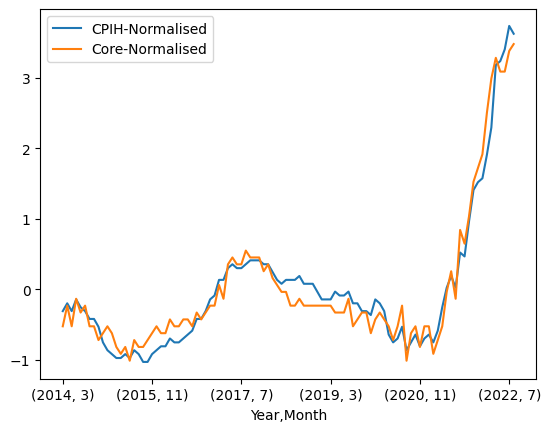

In [16]:
cidf.plot(y=['CPIH-Normalised', 'Core-Normalised'])
plt.show()

/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamali/Developer/PycharmProjects/COMP6237/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


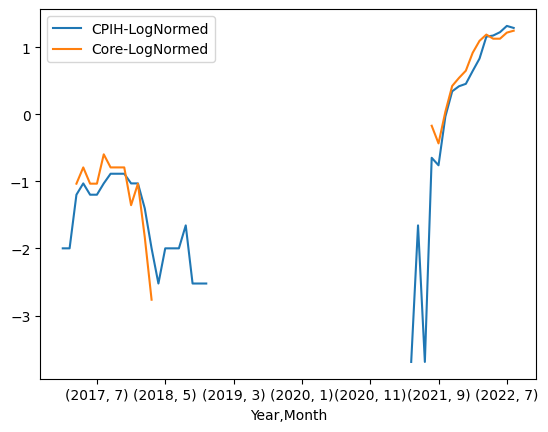

In [17]:
cidf['CPIH-LogNormed'] = np.log(cidf['CPIH-Normalised'])
cidf['Core-LogNormed'] = np.log(cidf['Core-Normalised'])
cidf.plot(y=['CPIH-LogNormed', 'Core-LogNormed'])
plt.show()

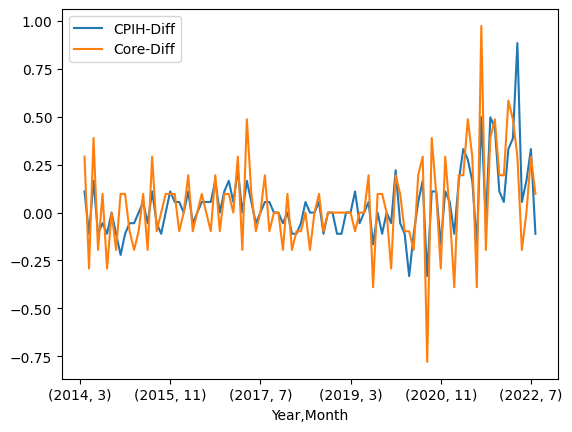

In [18]:
cidf['CPIH-Diff'] = cidf['CPIH-Normalised'].diff()
cidf['Core-Diff'] = cidf['Core-Normalised'].diff()
cidf.plot(y=['CPIH-Diff', 'Core-Diff'])
plt.show()

In [19]:
cidf.to_csv("data/cidf.csv")